In [59]:
import os
from PIL import Image               
import numpy as np                  
import matplotlib.pyplot as plt     
import sklearn.preprocessing

In [60]:
path ="C:/Users/Arnau/Desktop/ProvesPyCharm"
from os.path import isfile, join

In [61]:
ftrain = [f for f in os.listdir(path+"/train") if isfile(join(path+"/train", f))]
x_train = np.array([np.array(Image.open(path+"/train/"+file)) for file in ftrain])

In [62]:
ftest = [f for f in os.listdir(path+"/test") if isfile(join(path+"/test", f))]
x_test = np.array([np.array(Image.open(path+"/test/"+file)) for file in ftest])

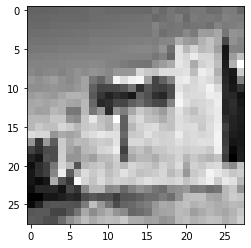

In [63]:
plt.imshow(x_train[1,:,:], cmap='gray')

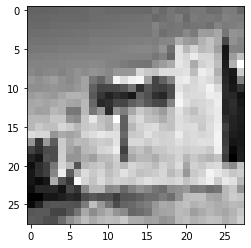

In [64]:
plt.imshow(x_test[1,:,:], cmap='gray')

In [65]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (57, 28, 28)
x_test shape: (57, 28, 28)


In [66]:
ntrain = len(x_train[:,1,1])
dxtrain = len(x_train[1,:,1]) 
dytrain = len(x_train[1,1,:]) 

In [67]:
ntest = len(x_test[:,1,1])
dxtest = len(x_test[1,:,1])
dytest = len(x_test[1,1,:])

In [68]:
x_train = x_train.reshape(ntrain, dxtrain*dytrain);
print("x_train shape:", x_train.shape)
x_test = x_test.reshape(ntest, dxtest*dytest);
print("x_test shape:", x_test.shape)

x_train shape: (57, 784)
x_test shape: (57, 784)


In [69]:
x_train_n = sklearn.preprocessing.normalize(x_train)
x_test_n = sklearn.preprocessing.normalize(x_test)

In [70]:
x_train_n = x_train_n.transpose()
sim = np.matmul(x_test_n, x_train_n)

In [71]:
print(sim)
print("sim shape:", sim.shape)

[[1.         0.81277737 0.87012285 ... 0.823039   0.82113324 0.83161815]
 [0.81277737 1.         0.79562412 ... 0.86823694 0.87809083 0.88556191]
 [0.87012285 0.79562412 1.         ... 0.80676194 0.79447902 0.75525899]
 ...
 [0.823039   0.86823694 0.80676194 ... 1.         0.95321358 0.88500733]
 [0.82113324 0.87809083 0.79447902 ... 0.95321358 1.         0.9105617 ]
 [0.83161815 0.88556191 0.75525899 ... 0.88500733 0.9105617  1.        ]]
sim shape: (57, 57)


In [72]:
ranks = np.argsort(sim, axis=1)[:,::-1]

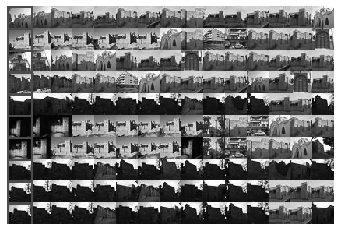

In [73]:
from PIL import Image, ImageOps

# get the original images for visualization
x_train = np.reshape(x_train, (ntrain, dxtrain, dytrain))
x_test = np.reshape(x_test, (ntest, dxtest, dytest))

h,w = (28, 28)
new_image= Image.new('RGB', (h*15,w*10))

# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10
for q in range(10):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(15):
      new_image.paste( Image.fromarray(x_train[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
  ima_q = Image.fromarray(x_test[q*(offset+1),...])
  ima_q = ImageOps.expand(ima_q, border=3, fill='green')

  new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()
